## Customer Personality Analysis using Machine Learning, Explainable AI and Parallel Computing.

### Environment Setup

In [1]:
! pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis'

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dinmohammaddohan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


100%|██████████| 62.0k/62.0k [00:00<00:00, 11.3MB/s]

In [5]:
!pwd

/content


### Importing Libraries and Load Data

In [6]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('/content/customer-personality-analysis/marketing_campaign.csv', sep="\t")
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

### Data Preprocessing

In [8]:
#Shape of the dataset
print("Shape of the DataFrame is :",df.shape)

Shape of the DataFrame is : (2240, 29)


In [9]:
#complete information of the dataset
print("Print a Summary of a Dataframe is :",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [12]:
#PERCENTAGE OF THE MISSING VALUES - DATAFRAME.....
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df).style.background_gradient(cmap='Greys')

In [13]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES..
df['Income']=df['Income'].fillna(df['Income'].median())

In [14]:
#CHECKING IF ANY NAN IS PRESENT IN COLUMN OR NOT....
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [15]:
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

In [16]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [17]:
for i in df.columns:
    print('{} contains {} classes'.format(i,len(df[i].value_counts())))

ID contains 2240 classes
Year_Birth contains 59 classes
Education contains 5 classes
Marital_Status contains 8 classes
Income contains 1975 classes
Kidhome contains 3 classes
Teenhome contains 3 classes
Dt_Customer contains 663 classes
Recency contains 100 classes
MntWines contains 776 classes
MntFruits contains 158 classes
MntMeatProducts contains 558 classes
MntFishProducts contains 182 classes
MntSweetProducts contains 177 classes
MntGoldProds contains 213 classes
NumDealsPurchases contains 15 classes
NumWebPurchases contains 15 classes
NumCatalogPurchases contains 14 classes
NumStorePurchases contains 14 classes
NumWebVisitsMonth contains 16 classes
AcceptedCmp3 contains 2 classes
AcceptedCmp4 contains 2 classes
AcceptedCmp5 contains 2 classes
AcceptedCmp1 contains 2 classes
AcceptedCmp2 contains 2 classes
Complain contains 2 classes
Z_CostContact contains 1 classes
Z_Revenue contains 1 classes
Response contains 2 classes


### Exploratory Data Analysis and Visualization

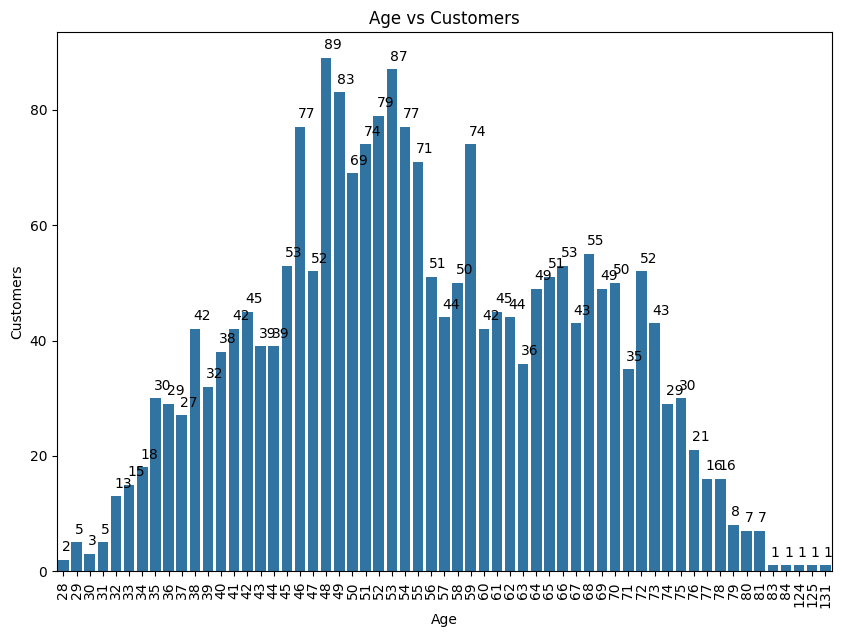

In [18]:
df['Age'] = 2024 - df['Year_Birth']  # Assuming current year is 2024

plt.figure(figsize = (10, 7))
plt.title('Age vs Customers')
ax=sns.countplot(x = 'Age', data =df)
plt.xlabel('Age')
plt.ylabel('Customers')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

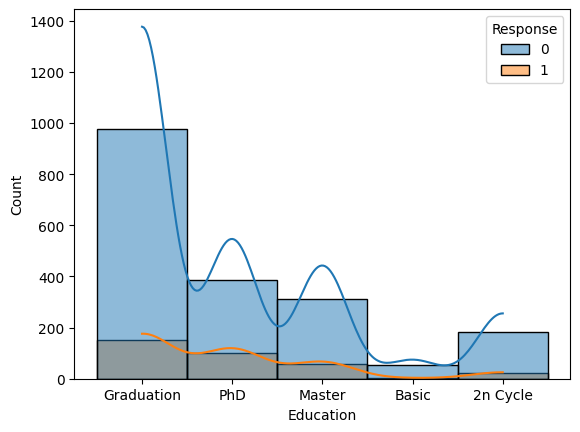

In [19]:
sns.histplot(x='Education', data=df, kde=True, hue='Response')
plt.show()

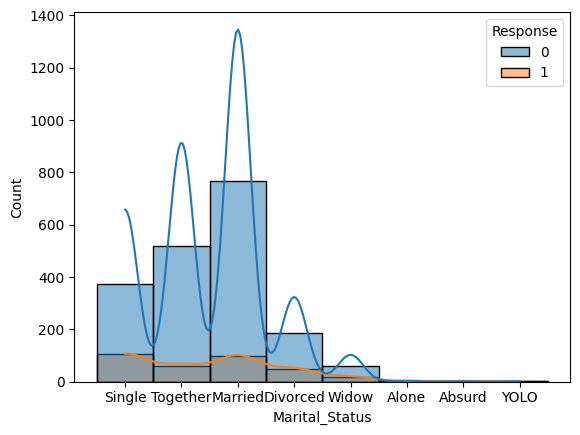

In [20]:
sns.histplot(x='Marital_Status', data=df, kde=True, hue='Response')
plt.show()

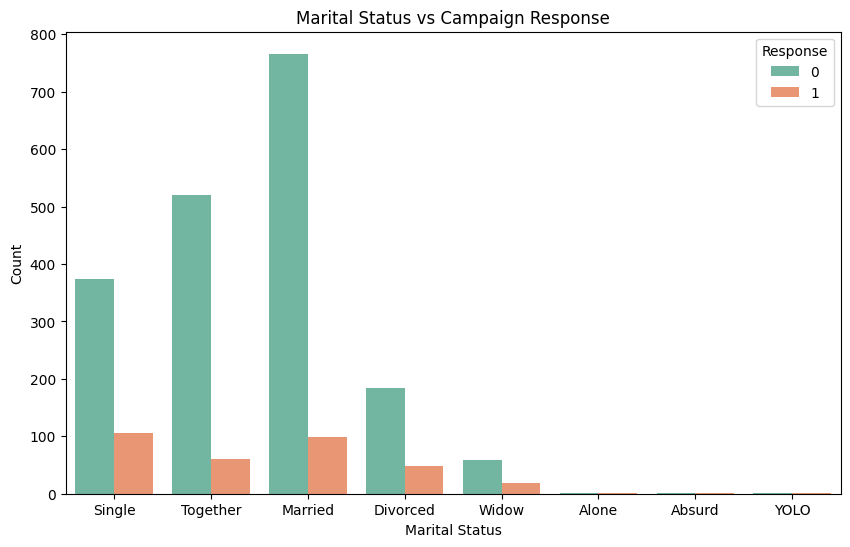

In [21]:
# Plot Marital Status vs Response
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='Response', data=df, palette='Set2')
plt.title('Marital Status vs Campaign Response')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Response', ylabel='Density'>

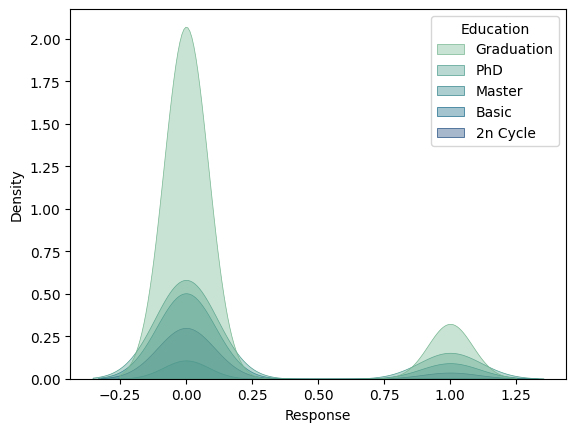

In [22]:
sns.kdeplot(x=df["Response"], hue = df["Education"],
            linewidth = 0.5, fill = True, multiple = "layer", cbar = True,
            palette = "crest", alpha = 0.4)

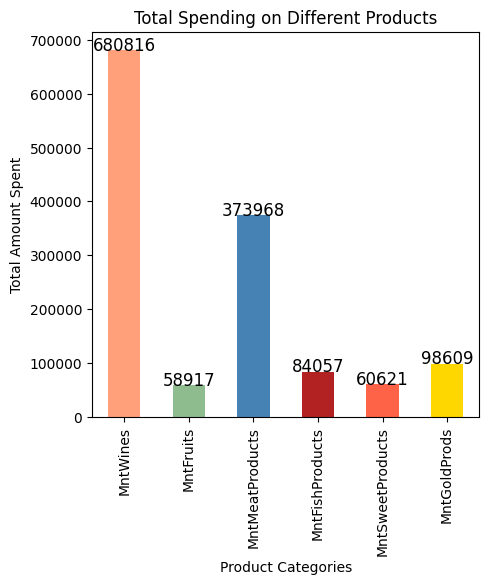

In [23]:
import matplotlib.pyplot as plt

# Plot spending distribution on different product categories
plt.figure(figsize=(5, 5))

# Select the product columns
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Sum of spending in each category
total_spending = df[product_cols].sum()

# Create a bar plot
bars = total_spending.plot(kind='bar', color=['#FFA07A', '#8FBC8F', '#4682B4', '#B22222', '#FF6347', '#FFD700'])

# Add count (total spending) on top of each bar
for i, total in enumerate(total_spending):
    plt.text(i, total + 10, f'{total:.0f}', ha='center', fontsize=12)

# Add titles and labels
plt.title('Total Spending on Different Products')
plt.ylabel('Total Amount Spent')
plt.xlabel('Product Categories')

# Display the plot
plt.show()


In [24]:
!pip install plotly matplotlib seaborn --quiet
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [25]:
fig = px.scatter_3d(df, x='Education', y='Marital_Status', z='Response')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

### Class Distribution

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0 

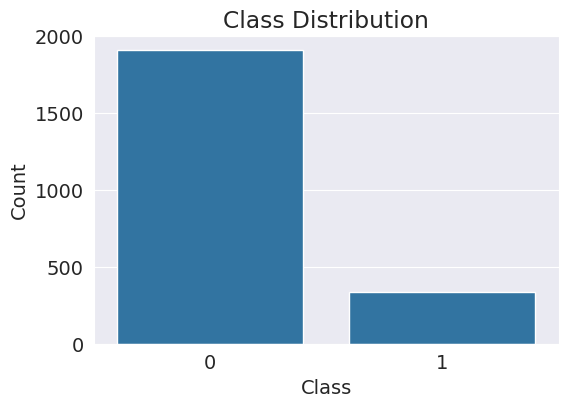

In [26]:
# Display the first few rows (optional)
print(df.head())

model_df = df.loc[:,["Education","Marital_Status","Income","Kidhome","Teenhome","Recency",
                     "MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",
                     "NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
                     "NumWebVisitsMonth","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Complain","Response"]]
model_df

X= model_df.drop(columns=['Response']) # Input columns
target_variable= 'Response' # Target coulumn - Changed to string

# Check the distribution of the target variable
class_counts = model_df[target_variable].value_counts() # Use the column name as a string to access the column
print("Class Counts:")
print(class_counts)

# Calculate the percentage distribution
class_percentages = model_df[target_variable].value_counts(normalize=True) * 100
print("\nClass Percentages:")
print(class_percentages)

# Plot the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target_variable, data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Prepare the Dataset for Training

In [27]:
model_df = df.loc[:,["Education","Marital_Status","Income","Kidhome","Teenhome","Recency",
                     "MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",
                     "NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
                     "NumWebVisitsMonth","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Complain","Response"]]
model_df

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0     Graduation         Single  58138.0        0         0       58   
1     Graduation         Single  46344.0        1         1       38   
2     Graduation       Together  71613.0        0         0       26   
3     Graduation       Together  26646.0        1         0       26   
4            PhD        Married  58293.0        1         0       94   
...          ...            ...      ...      ...       ...      ...   
2235  Graduation        Married  61223.0        0         1       46   
2236         PhD       Together  64014.0        2         1       56   
2237  Graduation       Divorced  56981.0        0         0       91   
2238      Master       Together  69245.0        0         1        8   
2239         PhD        Married  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   
1           11          1                6                2  ...   
2          426         49              127              111  ...   
3           11          4               20               10  ...   
4          173         43              118               46  ...   
...        ...        ...              ...              ...  ...   
2235       709         43              182               42  ...   
2236       406          0               30                0  ...   
2237       908         48              217               32  ...   
2238       428         30              214               80  ...   
2239        84          3               61                2  ...   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  \
0                      10                  4                  7             0   
1                       1                  2                  5             0   
2                       2                 10                  4             0   
3                       0                  4                  6             0   
4                       3                  6                  5             0   
...                   ...                ...                ...           ...   
2235                    3                  4                  5             0   
2236                    2                  5                  7             1   
2237                    3                 13                  6             0   
2238                    5                 10                  3             0   
2239                    1                  4                  7             0   

      AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             0             0         0   
2237             0             0             1             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Response  
0            1  
1            0  
2            0  
3            0  
4            0  
...        ...  
2235         0  
2236         0  
2237         0  
2238         0  
2239         1  

[2240 rows x 24 columns]

In [28]:
pd.set_option('display.max_columns',None) #display all columns

In [29]:
model_df.head(10)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation       Together  71613.0        0         0       26       426   
3  Graduation       Together  26646.0        1         0       26        11   
4         PhD        Married  58293.0        1         0       94       173   
5      Master       Together  62513.0        0         1       16       520   
6  Graduation       Divorced  55635.0        0         1       34       235   
7         PhD        Married  33454.0        1         0       32        76   
8         PhD       Together  30351.0        1         0       19        14   
9         PhD       Together   5648.0        1         1       68        28   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   
5         42               98                0                42   
6         65              164               50                49   
7         10               56                3                 1   
8          0               24                3                 3   
9          0                6                1                 1   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   
5            14                  2                6                    4   
6            27                  4                7                    3   
7            23                  2                4                    0   
8             2                  1                3                    0   
9            13                  1                1                    0   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   
5                 10                  6             0             0   
6                  7                  6             0             0   
7                  4                  8             0             0   
8                  2                  9             0             0   
9                  0                 20             0             0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  
5             0             0             0         0         0  
6             0             0             0         0         0  
7             0             0             0         0         0  
8             0             0             0         0         1  
9             1             0             0         0         0

### Identify Input and Target columns


In [30]:
X= model_df.drop(columns=['Response']) # Input columns
y= model_df['Response'] # Target coulumn

In [31]:
X.head(3)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation       Together  71613.0        0         0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Complain  
0             0             0             0         0  
1             0             0             0         0  
2             0             0             0         0

In [32]:
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

### Identify Numerical and Categorical Columns

In [33]:
numerical_cols = ['Recency', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                  'NumStorePurchases', 'NumWebVisitsMonth']

numerical_cols

['Recency',
 'Income',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [34]:
categorical_cols = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2',
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']

categorical_cols

['Education',
 'Marital_Status',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Complain']

Features Transformation and Scaling - MinMaxScaler, OneHotEncoding

### Scale Numeric values

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
scaler.fit(model_df[numerical_cols])

MinMaxScaler()

In [38]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[0.0, 1730.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [39]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[99.0,
 666666.0,
 1493.0,
 199.0,
 1725.0,
 259.0,
 263.0,
 362.0,
 15.0,
 27.0,
 28.0,
 13.0,
 20.0]

In [40]:
model_df[numerical_cols].describe().loc[['min', 'max']]

Recency    Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
min      0.0    1730.0       0.0        0.0              0.0              0.0   
max     99.0  666666.0    1493.0      199.0           1725.0            259.0   

     MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
min               0.0           0.0                0.0              0.0   
max             263.0         362.0               15.0             27.0   

     NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
min                  0.0                0.0                0.0  
max                 28.0               13.0               20.0

In [41]:
X[numerical_cols] = scaler.transform(X[numerical_cols])
X[numerical_cols].describe()

Recency       Income     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000  2240.000000      2240.000000   
mean      0.496054     0.075959     0.203574     0.132172         0.096783   
std       0.292550     0.037655     0.225450     0.199867         0.130849   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.242424     0.050845     0.015908     0.005025         0.009275   
50%       0.494949     0.074671     0.116209     0.040201         0.038841   
75%       0.747475     0.100099     0.337743     0.165829         0.134493   
max       1.000000     1.000000     1.000000     1.000000         1.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean          0.144886          0.102901      0.121607           0.155000   
std           0.210923          0.156960      0.144109           0.128816   
min           0.000000          0.000000      0.000000           0.000000   
25%           0.011583          0.003802      0.024862           0.066667   
50%           0.046332          0.030418      0.066298           0.133333   
75%           0.193050          0.125475      0.154696           0.200000   
max           1.000000          1.000000      1.000000           1.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          0.151290             0.095073           0.445398   
std           0.102915             0.104396           0.250074   
min           0.000000             0.000000           0.000000   
25%           0.074074             0.000000           0.230769   
50%           0.148148             0.071429           0.384615   
75%           0.222222             0.142857           0.615385   
max           1.000000             1.000000           1.000000   

       NumWebVisitsMonth  
count        2240.000000  
mean            0.265826  
std             0.121332  
min             0.000000  
25%             0.150000  
50%             0.300000  
75%             0.350000  
max             1.000000

In [42]:
model_df[categorical_cols].nunique()

Education         5
Marital_Status    8
AcceptedCmp1      2
AcceptedCmp2      2
AcceptedCmp3      2
AcceptedCmp4      2
AcceptedCmp5      2
Complain          2
dtype: int64

### Encode Categorical columns

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse is deprecated and replaced by sparse_output

In [45]:
encoder.fit(model_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [46]:
encoder.categories_

[array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object),
 array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
        'Widow', 'YOLO'], dtype=object),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1])]

In [47]:
# Use get_feature_names_out instead of get_feature_names
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO', 'AcceptedCmp1_0', 'AcceptedCmp1_1', 'AcceptedCmp2_0', 'AcceptedCmp2_1', 'AcceptedCmp3_0', 'AcceptedCmp3_1', 'AcceptedCmp4_0', 'AcceptedCmp4_1', 'AcceptedCmp5_0', 'AcceptedCmp5_1', 'Complain_0', 'Complain_1']


In [48]:
X.isna().value_counts()

Education  Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Complain
False      False           False   False    False     False    False     False      False            False            False             False         False              False            False                False              False              False         False         False         False         False         False       2240
Name: count, dtype: int64

In [49]:
X[encoded_cols] = encoder.transform(X[categorical_cols])

In [50]:
X_train = X[numerical_cols + encoded_cols]
X_test= X[numerical_cols + encoded_cols]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)
print('y_train.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

X_train.shape : (1792, 48)
X_test.shape : (448, 48)
y_train.shape : (1792,)
y_test.shape : (448,)


In [53]:
X_train.head(3)

Education Marital_Status    Income  Kidhome  Teenhome   Recency  \
903   Graduation       Together  0.083271        0         0  0.191919   
1411  Graduation        Married  0.117912        1         0  0.404040   
1455  Graduation       Together  0.100709        0         0  0.030303   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
903   0.121232   0.105528         0.040000         0.150579          0.011407   
1411  0.815807   0.080402         0.157681         0.401544          0.000000   
1455  0.306765   0.407035         0.206377         0.409266          0.190114   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
903       0.265193           0.066667         0.111111             0.107143   
1411      0.220994           0.133333         0.185185             0.107143   
1455      0.110497           0.066667         0.148148             0.142857   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
903            0.461538               0.15             0             0   
1411           0.461538               0.30             1             0   
1455           0.538462               0.10             0             0   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Complain  Education_2n Cycle  \
903              0             0             0         0                 0.0   
1411             0             1             1         0                 0.0   
1455             0             0             0         0                 0.0   

      Education_Basic  Education_Graduation  Education_Master  Education_PhD  \
903               0.0                   1.0               0.0            0.0   
1411              0.0                   1.0               0.0            0.0   
1455              0.0                   1.0               0.0            0.0   

      Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
903                     0.0                   0.0                      0.0   
1411                    0.0                   0.0                      0.0   
1455                    0.0                   0.0                      0.0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
903                      0.0                    0.0                      1.0   
1411                     1.0                    0.0                      0.0   
1455                     0.0                    0.0                      1.0   

      Marital_Status_Widow  Marital_Status_YOLO  AcceptedCmp1_0  \
903                    0.0                  0.0             1.0   
1411                   0.0                  0.0             0.0   
1455                   0.0                  0.0             1.0   

      AcceptedCmp1_1  AcceptedCmp2_0  AcceptedCmp2_1  AcceptedCmp3_0  \
903              0.0             1.0             0.0             1.0   
1411             1.0             1.0             0.0             1.0   
1455             0.0             1.0             0.0             1.0   

      AcceptedCmp3_1  AcceptedCmp4_0  AcceptedCmp4_1  AcceptedCmp5_0  \
903              0.0             1.0             0.0             1.0   
1411             0.0             0.0             1.0             0.0   
1455             0.0             1.0             0.0             1.0   

      AcceptedCmp5_1  Complain_0  Complain_1  
903              0.0         1.0         0.0  
1411             1.0         1.0         0.0  
1455             0.0         1.0         0.0

In [54]:
y_train.head(3)

903     0
1411    1
1455    0
Name: Response, dtype: int64

In [55]:
X.isna().sum()

Education                  0
Marital_Status             0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp1               0
AcceptedCmp2               0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
Complain                   0
Education_2n Cycle         0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Absurd      0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
AcceptedCmp1_0             0
AcceptedCmp1_1             0
AcceptedCmp2_0             0
AcceptedCmp2_1             0
AcceptedCmp3_0             0
AcceptedCmp3_1             0
AcceptedCmp4_0             0
AcceptedCmp4_1             0
AcceptedCmp5_0             0
AcceptedCmp5_1             0
Complain_0                 0
Complain_1                 0
dtype: int64

In [56]:
# Creating the DataFrame (assuming df is already loaded)
model_df = df.loc[:, ["Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "Recency",
                      "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts",
                      "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
                      "NumStorePurchases", "NumWebVisitsMonth", "AcceptedCmp1", "AcceptedCmp2",
                      "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]]

# One-hot encoding the categorical columns: 'Education' and 'Marital_Status'
model_df_encoded = pd.get_dummies(model_df, columns=["Education", "Marital_Status"], drop_first=True)

# Display the one-hot encoded DataFrame
model_df_encoded.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  Education_Basic  Education_Graduation  \
0         0         1            False                  True   
1         0         0            False                  True   
2         0         0            False                  True   
3         0         0            False                  True   
4         0         0            False                 False   

   Education_Master  Education_PhD  Marital_Status_Alone  \
0             False          False                 False   
1             False          False                 False   
2             False          False                 False   
3             False          False                 False   
4             False           True                 False   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                    False                   False                   True   
1                    False                   False                   True   
2                    False                   False                  False   
3                    False                   False                  False   
4                    False                    True                  False   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  
0                    False                 False                False  
1                    False                 False                False  
2                     True                 False                False  
3                     True                 False                False  
4                    False                 False                False

In [93]:
model_df_encoded.to_csv('/content/model_df_encoded.csv', index=False)

### Correlation Matrix

In [57]:
# Calculating the correlation matrix
correlation_matrix = model_df_encoded.corr()

# Displaying the correlation matrix
print(correlation_matrix)

                           Income   Kidhome  Teenhome   Recency  MntWines  \
Income                   1.000000 -0.425326  0.018965 -0.004061  0.576903   
Kidhome                 -0.425326  1.000000 -0.036133  0.008827 -0.496297   
Teenhome                 0.018965 -0.036133  1.000000  0.016198  0.004846   
Recency                 -0.004061  0.008827  0.016198  1.000000  0.016064   
MntWines                 0.576903 -0.496297  0.004846  0.016064  1.000000   
MntFruits                0.428791 -0.372581 -0.176764 -0.004306  0.389637   
MntMeatProducts          0.577805 -0.437129 -0.261160  0.023056  0.562667   
MntFishProducts          0.437564 -0.387644 -0.204187  0.001079  0.399753   
MntSweetProducts         0.436131 -0.370673 -0.162475  0.022670  0.386581   
MntGoldProds             0.321938 -0.349595 -0.021725  0.016693  0.387516   
NumDealsPurchases       -0.082315  0.221798  0.387741 -0.001098  0.010940   
NumWebPurchases          0.380554 -0.361647  0.155500 -0.010726  0.542265   

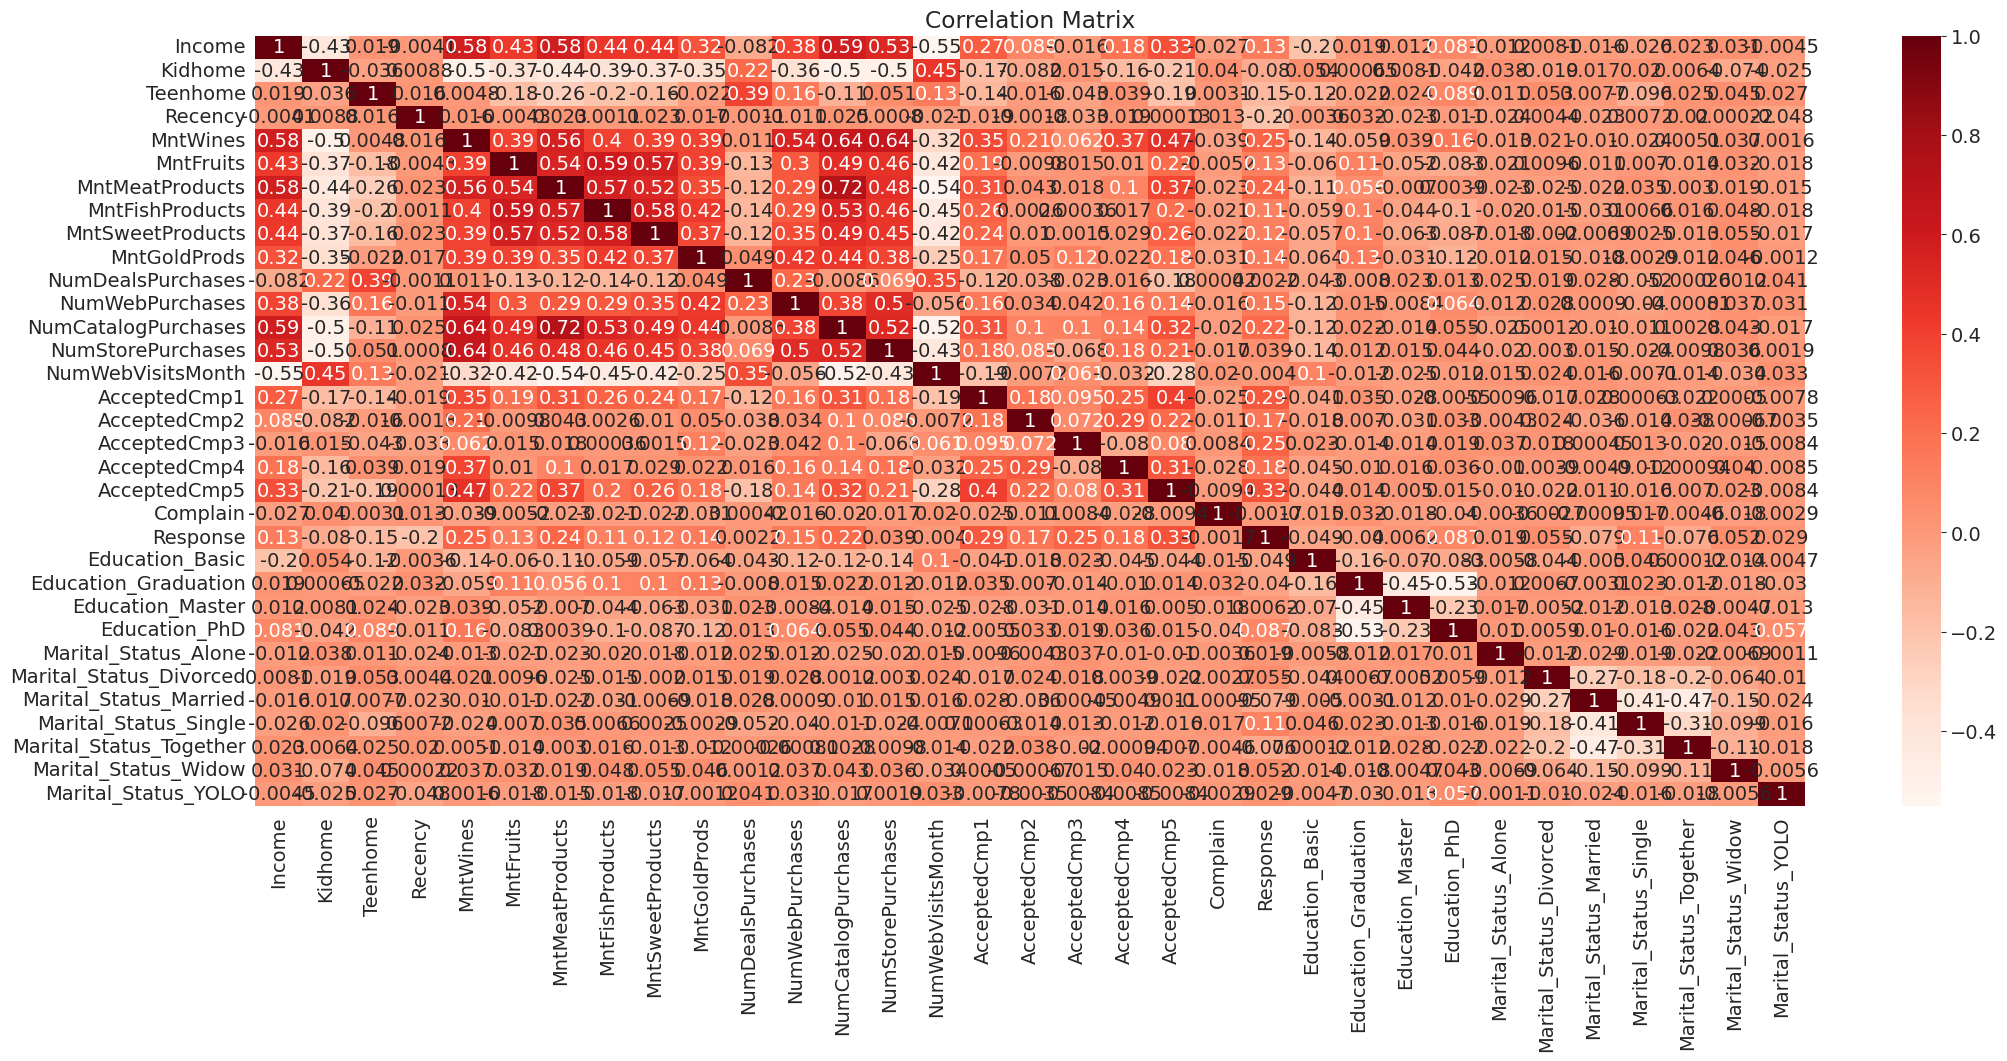

In [58]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(model_df_encoded.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [59]:
X_train = X_train[numerical_cols + encoded_cols]
X_test = X_test[numerical_cols + encoded_cols]

### Apply Machine Learning Model (Classification) without Balancing Techniques

In [60]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# List of models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis()
}


In [61]:
# Train and evaluate models
for model_name, model in models.items():
    print(f"\n\n=== {model_name} ===")

    # Fitting the model
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Classification report
    report = classification_report(y_test, y_pred)

    # Printing the results
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print("Classification Report:")
    print(report)




=== Logistic Regression ===
Accuracy: 0.8772321428571429
F1 Score: 0.4329896907216495
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       382
           1       0.68      0.32      0.43        66

    accuracy                           0.88       448
   macro avg       0.78      0.65      0.68       448
weighted avg       0.86      0.88      0.86       448



=== Decision Tree ===
Accuracy: 0.8236607142857143
F1 Score: 0.4316546762589928
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       382
           1       0.41      0.45      0.43        66

    accuracy                           0.82       448
   macro avg       0.66      0.67      0.66       448
weighted avg       0.83      0.82      0.83       448



=== Random Forest ===
Accuracy: 0.8772321428571429
F1 Score: 0.4329896907216495
Classification Report:
              precision  

In [62]:
!pip install imbalanced-learn xgboost lightgbm

In [63]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
#Import BalancedRandomForestClassifier from imblearn.ensemble
from imblearn.ensemble import BalancedRandomForestClassifier

# List of models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "Balanced RandomForest": BalancedRandomForestClassifier(random_state=42),
    "Voting Classifier": VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()), ('svc', SVC()), ('gb', GradientBoostingClassifier())
    ])
}

In [64]:
from imblearn.pipeline import Pipeline

# Define resampling techniques
balancers = {
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SMOTEEN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}


In [65]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
#Import BalancedRandomForestClassifier from imblearn.ensemble
from imblearn.ensemble import BalancedRandomForestClassifier
import pandas as pd # import pandas

# List of models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "Balanced RandomForest": BalancedRandomForestClassifier(random_state=42),
    "Voting Classifier": VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()), ('svc', SVC()), ('gb', GradientBoostingClassifier())
    ])
}

from imblearn.pipeline import Pipeline

# Define resampling techniques
balancers = {
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SMOTEEN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(X_train, X_test, y_train, y_test, model, balancer=None):
    if balancer:
        pipeline = Pipeline(steps=[('balancer', balancer), ('model', model)])
    else:
        pipeline = model

    # Train the model

    # Check if any columns in X_train are of type 'object' (likely string columns)
    object_columns = X_train.select_dtypes(include=['object']).columns

    # If object columns exist, print them and raise a ValueError to stop execution
    if len(object_columns) > 0:
        raise ValueError(f"X_train contains string columns: {object_columns}. Please encode these columns before fitting the model.")

    pipeline.fit(X_train, y_train)

    # Predict on test data
    y_pred = pipeline.predict(X_test)

    # Metrics
    accuracy

### Apply Machine Learning Model (Classification) with Balancing Techniques

In [67]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline
import pandas as pd

# List of models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "Balanced RandomForest": BalancedRandomForestClassifier(random_state=42),
    "Voting Classifier": VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()), ('svc', SVC()), ('gb', GradientBoostingClassifier())
    ])
}

# Define resampling techniques
balancers = {
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SMOTEEN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(X_train, X_test, y_train, y_test, model, balancer=None):
    if balancer:
        pipeline = Pipeline(steps=[('balancer', balancer), ('model', model)])
    else:
        pipeline = model

    # Encode categorical features in X_train and X_test
    for col in X_train.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    pipeline.fit(X_train, y_train)

    # Predict on test data
    y_pred = pipeline.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass problems
    report = classification_report(y_test, y_pred)

    return accuracy, f1, report

# Run models with each balancer
results = []

for balancer_name, balancer in balancers.items():
    for model_name, model in models.items():
        print(f"\n=== Balancer: {balancer_name}, Model: {model_name} ===")
        accuracy, f1, report = evaluate_model(X_train, X_test, y_train, y_test, model, balancer)

        # Store the result
        results.append({
            'balancer': balancer_name,
            'model': model_name,
            'accuracy': accuracy,
            'f1_score': f1,
            'classification_report': report
        })

        # Print the evaluation
        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Classification Report:\n{report}")

# Function to identify best model and balancer combination
best_result = max(results, key=lambda x: x['f1_score'])

print("\n=== Best Model ===")
print(f"Balancer: {best_result['balancer']}")
print(f"Model: {best_result['model']}")
print(f"Accuracy: {best_result['accuracy']}")
print(f"F1 Score: {best_result['f1_score']}")
print(f"Classification Report:\n{best_result['classification_report']}")



=== Balancer: Random Undersampling, Model: Logistic Regression ===
Accuracy: 0.7566964285714286
F1 Score: 0.7823643813390603
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       379
           1       0.34      0.62      0.44        69

    accuracy                           0.76       448
   macro avg       0.63      0.70      0.64       448
weighted avg       0.83      0.76      0.78       448


=== Balancer: Random Undersampling, Model: Decision Tree ===
Accuracy: 0.734375
F1 Score: 0.7685090660705415
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       379
           1       0.34      0.77      0.47        69

    accuracy                           0.73       448
   macro avg       0.64      0.75      0.65       448
weighted avg       0.85      0.73      0.77       448


=== Balancer: Random Undersampling, Model: Random Forest ===
Ac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 265, number of negative: 1527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 1792, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147879 -> initscore=-1.751330
[LightGBM] [Info] Start training from score -1.751330


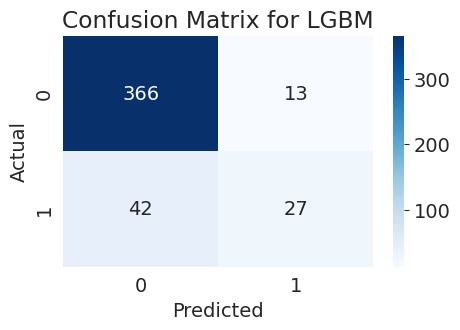

In [72]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if X_train and X_test are DataFrames
def encode_categorical(X_train, X_test):
    # Only perform encoding if they are pandas DataFrames
    if isinstance(X_train, pd.DataFrame):
        for col in X_train.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
    return X_train, X_test

# Apply encoding before converting to NumPy arrays
X_train, X_test = encode_categorical(X_train, X_test)

# Function to evaluate models
def evaluate_model(X_train, X_test, y_train, y_test, model, balancer=None):
    if balancer:
        pipeline = Pipeline(steps=[('balancer', balancer), ('model', model)])
    else:
        pipeline = model

    pipeline.fit(X_train, y_train)

    # Predict on test data
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Calculate AUROC if possible
    if y_pred_proba is not None:
        try:
            auroc = roc_auc_score(y_test, y_pred_proba)
        except:
            auroc = "Not Applicable"
    else:
        auroc = "Not Applicable"

    return accuracy, f1, report, mcc, auroc

# Running models and plotting confusion matrix for XGBoost
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LGBM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 265, number of negative: 1527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 1792, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147879 -> initscore=-1.751330
[LightGBM] [Info] Start training from score -1.751330


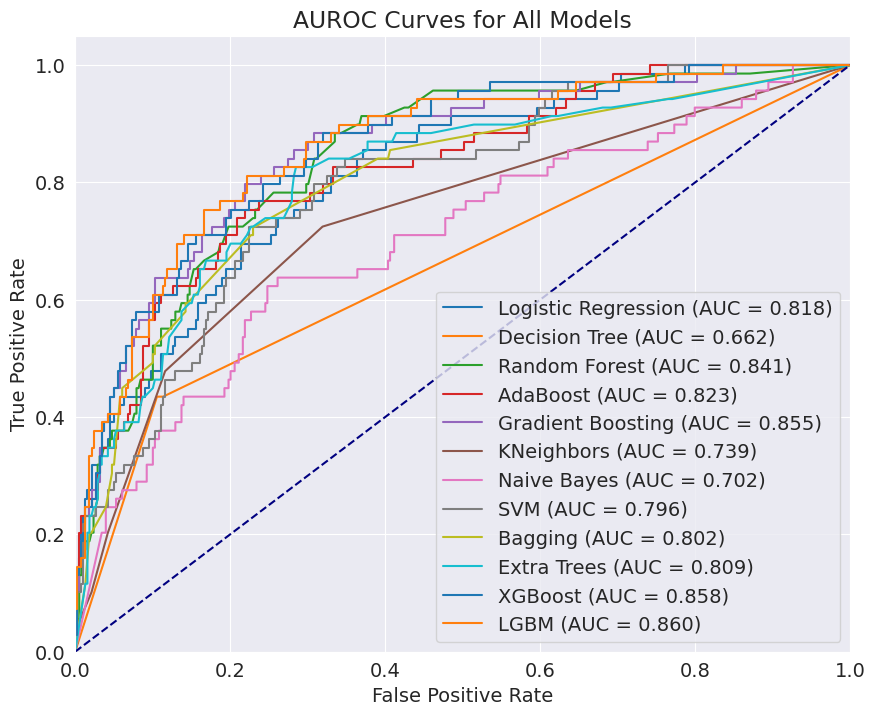

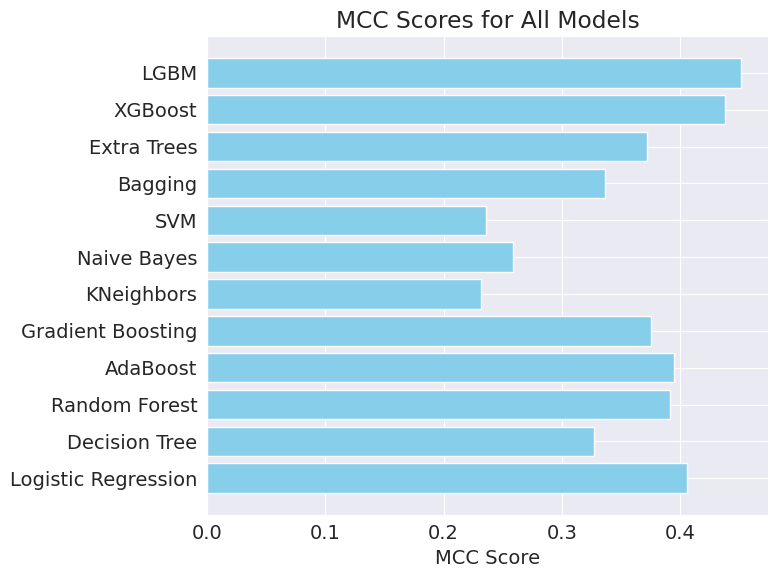

In [71]:
from sklearn.metrics import roc_curve, auc, matthews_corrcoef, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have models in a dictionary and have already fit them
# Replace with your own train/test splits if necessary
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),  # Set probability=True for AUROC
    "Bagging": BaggingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42),
}

# Check if X_train and X_test are DataFrames
def encode_categorical(X_train, X_test):
    # Only perform encoding if they are pandas DataFrames
    if isinstance(X_train, pd.DataFrame):
        for col in X_train.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
    return X_train, X_test

# Apply encoding before converting to NumPy arrays
X_train, X_test = encode_categorical(X_train, X_test)


# Store ROC data and MCC scores
roc_data = {}
mcc_scores = {}

# Plot ROC curve and compute MCC for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Get probability predictions for AUROC curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        # For models like SVM that don't have predict_proba, use decision_function
        y_pred_proba = model.decision_function(X_test)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[model_name] = (fpr, tpr, roc_auc)

    # Calculate MCC
    y_pred = model.predict(X_test)
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_scores[model_name] = mcc

    # Plot the ROC curve for this model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

# Plot the ROC curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curves for All Models')
plt.legend(loc="lower right")
plt.show()

# Plot MCC scores
plt.figure(figsize=(8, 6))
plt.barh(list(mcc_scores.keys()), list(mcc_scores.values()), color='skyblue')
plt.xlabel('MCC Score')
plt.title('MCC Scores for All Models')
plt.tight_layout()
plt.show()


In [73]:
# from sklearn.metrics import roc_curve, auc, matthews_corrcoef, roc_auc_score
# import matplotlib.pyplot as plt
# from imblearn.pipeline import Pipeline
# import numpy as np

# # Balancers (resampling techniques)
# balancers = {
#     "Random Undersampling": RandomUnderSampler(random_state=42),
#     "Random Oversampling": RandomOverSampler(random_state=42),
#     "SMOTE": SMOTE(random_state=42),
#     "ADASYN": ADASYN(random_state=42),
#     "SMOTEEN": SMOTEENN(random_state=42),
#     "SMOTETomek": SMOTETomek(random_state=42)
# }

# # List of models
# models = {
#     "Logistic Regression": LogisticRegression(random_state=42),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "AdaBoost": AdaBoostClassifier(random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42),
#     "KNeighbors": KNeighborsClassifier(),
#     "Naive Bayes": GaussianNB(),
#     "SVM": SVC(probability=True, random_state=42),  # probability=True for AUROC
#     "Bagging": BaggingClassifier(random_state=42),
#     "Extra Trees": ExtraTreesClassifier(random_state=42),
#     "XGBoost": XGBClassifier(random_state=42),
#     "LGBM": LGBMClassifier(random_state=42),
# }

# # Split your data (X, y) into train/test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Store ROC data and MCC scores
# roc_data = {}
# mcc_scores = {}

# # Plot ROC curve and compute MCC for each model and balancer
# plt.figure(figsize=(10, 8))

# for balancer_name, balancer in balancers.items():
#     for model_name, model in models.items():
#         print(f"Processing {model_name} with {balancer_name}...")

#         # Create a pipeline for the model and the resampler
#         pipeline = Pipeline(steps=[('balancer', balancer), ('model', model)])

#         # Fit the model with resampled data
#         pipeline.fit(X_train, y_train)

#         # Get probability predictions for AUROC curve
#         if hasattr(pipeline.named_steps['model'], "predict_proba"):
#             y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
#         else:
#             # For models like SVM that don't have predict_proba, use decision_function
#             y_pred_proba = pipeline.decision_function(X_test)

#         # Calculate ROC curve
#         fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#         roc_auc = auc(fpr, tpr)
#         roc_data[f"{model_name} + {balancer_name}"] = (fpr, tpr, roc_auc)

#         # Calculate MCC
#         y_pred = pipeline.predict(X_test)
#         mcc = matthews_corrcoef(y_test, y_pred)
#         mcc_scores[f"{model_name} + {balancer_name}"] = mcc

#         # Plot the ROC curve for this model and balancer
#         plt.plot(fpr, tpr, label=f'{model_name} + {balancer_name} (AUC = {roc_auc:.2f})')

# # Plot the ROC curve
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('AUROC Curves for All Models and Balancers')
# plt.legend(loc="lower right")
# plt.show()

# # Plot MCC scores
# plt.figure(figsize=(12, 8))
# plt.barh(list(mcc_scores.keys()), list(mcc_scores.values()), color='skyblue')
# plt.xlabel('MCC Score')
# plt.title('MCC Scores for All Models and Balancers')
# plt.tight_layout()
# plt.show()


### Feature Importance with Gradient Boosting Model

In [74]:
# Create and fit the GradientBoostingClassifier model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train) # Added y_train

# Get the feature importances from the fitted model
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgbm_model.feature_importances_
}).sort_values('importance', ascending=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 265, number of negative: 1527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 1792, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147879 -> initscore=-1.751330
[LightGBM] [Info] Start training from score -1.751330


In [75]:
importance_df.head(15)

feature  importance
8          MntMeatProducts         334
5                  Recency         304
2                   Income         257
6                 MntWines         257
10        MntSweetProducts         221
11            MntGoldProds         205
9          MntFishProducts         185
16       NumWebVisitsMonth         149
7                MntFruits         146
15       NumStorePurchases         135
14     NumCatalogPurchases         105
0                Education          96
13         NumWebPurchases          85
12       NumDealsPurchases          67
31  Marital_Status_Married          46

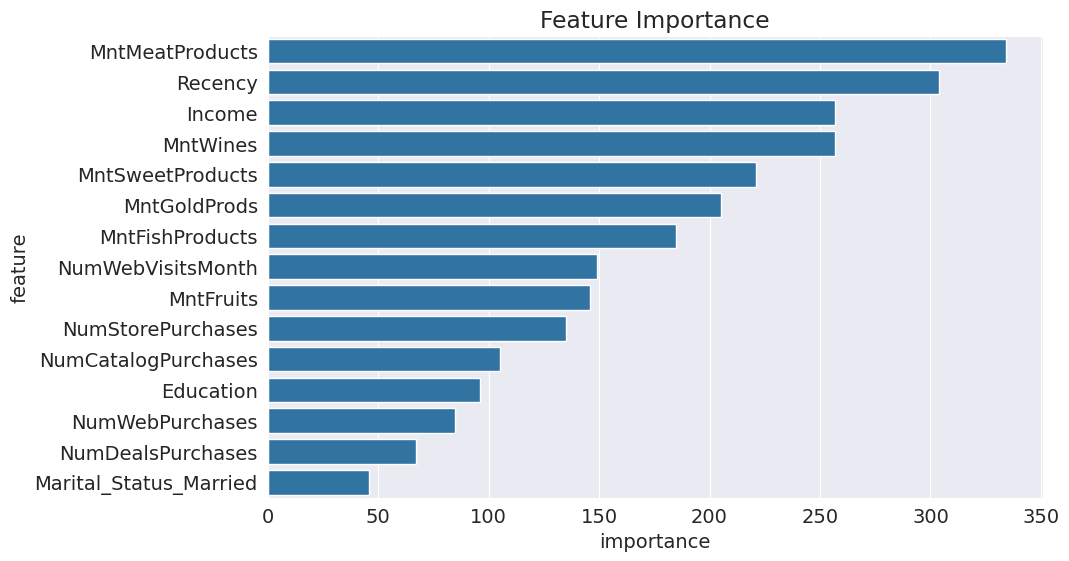

In [76]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(15), x='importance', y='feature');

In [77]:
# Predict on your test data
test_preds = lgbm_model.predict(X_test)
test_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
test_probs = lgbm_model.predict(X_test)
test_probs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [79]:
y_pred = lgbm_model.predict(X_test)

### Actual Value and Predicted Value using Gradient Boosting Model

In [80]:
pred_y = pd.DataFrame({'actual_value': y_test, 'predicted_value': y_pred, 'Difference': y_test-y_pred})
pred_y[:20]

actual_value  predicted_value  Difference
324              0                0           0
96               0                0           0
2104             0                0           0
1259             0                0           0
1061             0                0           0
1805             0                0           0
916              0                0           0
350              0                0           0
1901             0                0           0
1650             0                0           0
179              0                0           0
1697             0                0           0
1442             1                0           1
787              1                1           0
1251             0                0           0
1380             0                0           0
1303             0                0           0
1913             1                0           1
629              0                0           0
1376             0                0           0

### Explainable AI - LIME, SHAP

In [81]:
!pip install lime
# Install the lime package using pip.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1850a18a3e90f7e9ab7777e9dc577989d7da14190b13b4155acc64113ced31a5
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [82]:
import lime
import lime.lime_tabular

# LIME for explanation
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['0', '1'], mode='classification')

# Choose a sample to explain
exp = explainer.explain_instance(X_test.values[1], lgbm_model.predict_proba)
exp.show_in_notebook()


In [83]:
!pip install shap
# Install the shap package using pip.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 22.9 MB/s eta 0:00:00


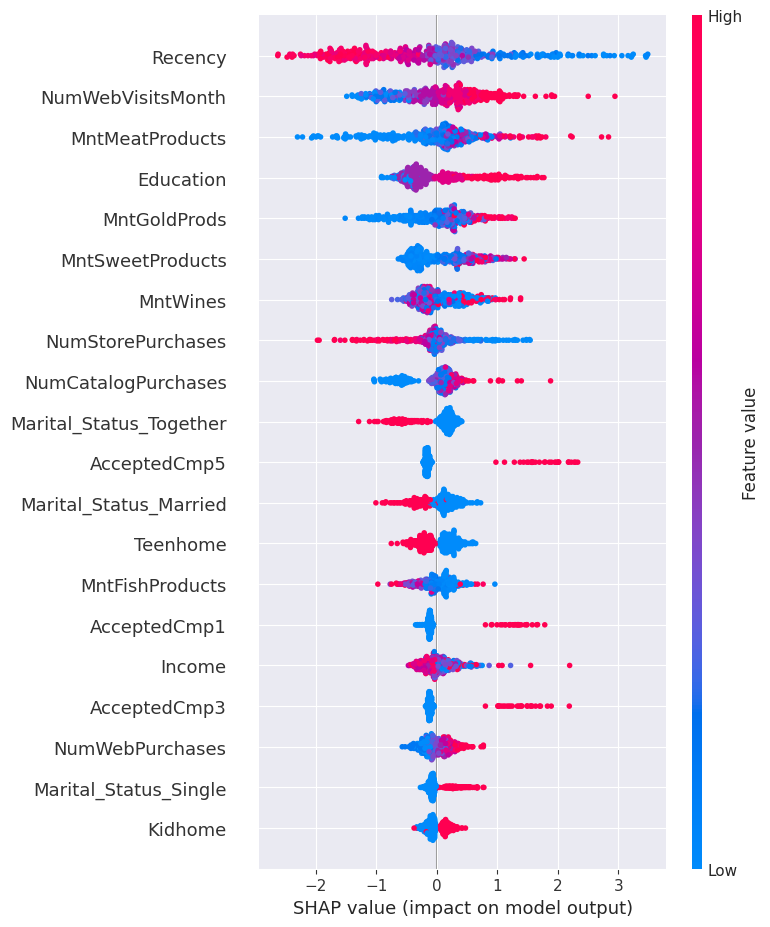

In [84]:
import shap

# Train SHAP explainer for XGBoost
explainer = shap.Explainer(lgbm_model)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)

### Applying KMeans Cluster - PCA


Explained variance by each component: [0.43487201 0.13747057]


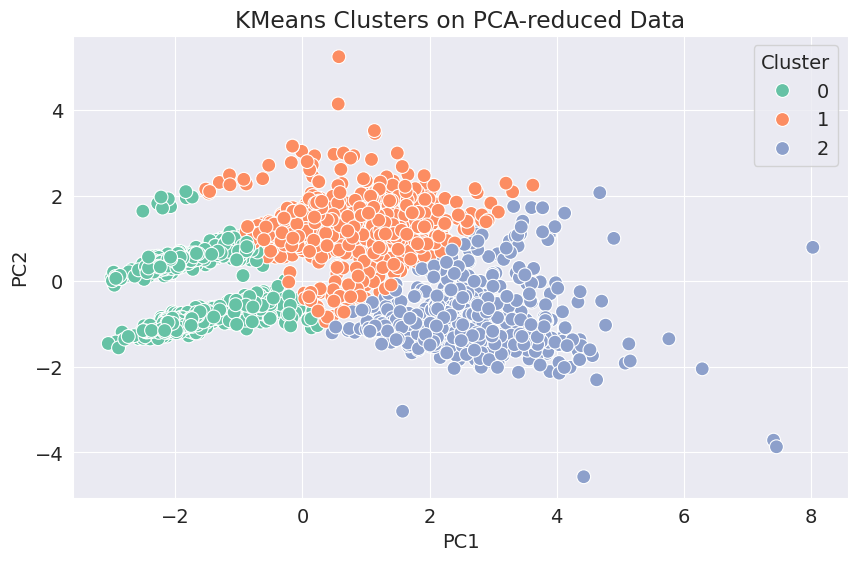

In [85]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for clustering
columns_for_clustering = ['MntWines', 'MntMeatProducts', 'MntSweetProducts',
                          'Income', 'Kidhome', 'Teenhome', 'Recency',
                          'NumWebPurchases', 'NumCatalogPurchases']

# Create a new dataframe with the selected columns
clustering_df = df[columns_for_clustering]

# Standardize the data (PCA and KMeans are sensitive to the scale of the data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_df)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
pca_data = pca.fit_transform(scaled_data)

# Create a dataframe with the PCA results
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Plot the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

# Apply KMeans clustering on the PCA results
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust n_clusters based on your needs
pca_df['Cluster'] = kmeans.fit_predict(pca_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2', s=100)
plt.title('KMeans Clusters on PCA-reduced Data')
plt.show()


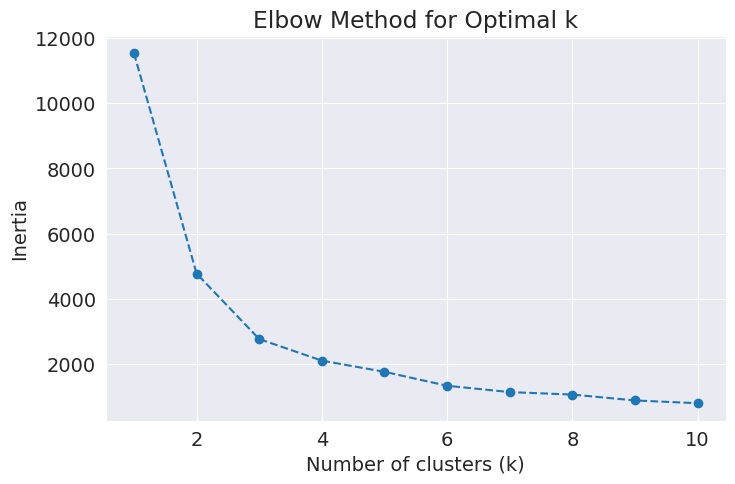

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the inertia (sum of squared distances) for different number of clusters
inertia = []
K_range = range(1, 11)  # Try from 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


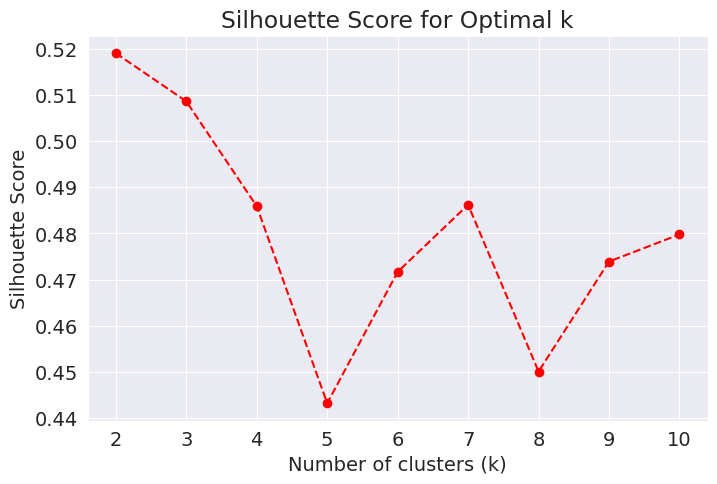

In [87]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different number of clusters
silhouette_scores = []
K_range = range(2, 11)  # Try from 2 to 10 clusters (silhouette score requires at least 2 clusters)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    score = silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette score graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


### Using Joblib for Parallelizing RandomForestClassifier


In [88]:
from sklearn.ensemble import RandomForestClassifier
from joblib import Parallel, delayed
from sklearn.model_selection import cross_val_score
import numpy as np


# Define X and y
X = df[["Income", "Kidhome", "Teenhome", "Recency", "MntWines",
                "MntFruits", "MntMeatProducts", "MntFishProducts",
                "MntSweetProducts", "MntGoldProds", "NumDealsPurchases",
                "NumWebPurchases", "NumCatalogPurchases",
                "NumStorePurchases", "NumWebVisitsMonth", "AcceptedCmp1",
                "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
                "AcceptedCmp5", "Complain"]].values

y = df['Response'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Parallel cross-validation using joblib
n_jobs = -1  # This will use all available processors
scores = Parallel(n_jobs=n_jobs)(
    delayed(cross_val_score)(model, X_train, y_train, cv=5) for _ in range(5)
)

# Calculate the mean score across folds
mean_score = np.mean(scores)
print(f"Mean cross-validated score with parallel computing: {mean_score}")


Mean cross-validated score with parallel computing: 0.883367828076127


### Using Dask for Parallel Computation:


In [91]:
!pip install dask_ml

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 10.4 MB/s eta 0:00:00


In [92]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

from dask.distributed import Client
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
# from dask_ml.ensemble import RandomForestClassifier

# Initialize the Dask client for distributed computing
client = Client()

# Convert pandas dataframe to Dask dataframe
ddf = dd.from_pandas(df, npartitions=4)

# Define X and y
X = ddf[["Income", "Kidhome", "Teenhome", "Recency",
         "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
         "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",
         "NumWebVisitsMonth", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain"]]
y = ddf['Response']

# Split the dataset (this uses Dask's parallelized train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Dask RandomForest classifier
dask_rf = RandomForestClassifier(n_estimators=100)

# Train the model in parallel
dask_rf.fit(X_train, y_train)

# Evaluate the model
score = dask_rf.score(X_test, y_test)
print(f"Dask RandomForest Score: {score}")

# Close the Dask client
client.close()


INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:33901
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:42063/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37583'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38705'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42215', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42215
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41342
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37307', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37307
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41338
INFO:distributed.scheduler:Receive 

Dask RandomForest Score: 0.8789144050104384


INFO:distributed.scheduler:Scheduler closing due to unknown reason...
INFO:distributed.scheduler:Scheduler closing all comms
